In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv(r'C:\Users\msai8\OneDrive\Desktop\ML\mainData.csv')

In [3]:
data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [4]:
data.shape

(3276, 10)

## Data Cleaning


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [6]:
data.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [7]:
data.fillna(data.mean(),inplace = True)

# Exploratory Data Analysis

In [8]:
data.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.469956,32.879761,8768.570828,1.583085,36.142612,80.824064,3.308162,15.769881,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.277673,176.850538,15666.690297,6.127421,317.094638,365.734414,12.065801,56.647656,3.439711,0.000000
50%,7.080795,196.967627,20927.833607,7.130299,333.775777,421.884968,14.218338,66.396293,3.955028,0.000000
75%,7.870050,216.667456,27332.762127,8.114887,350.385756,481.792304,16.557652,76.666609,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


####  Checking if we need to do Dimensonality Reduction

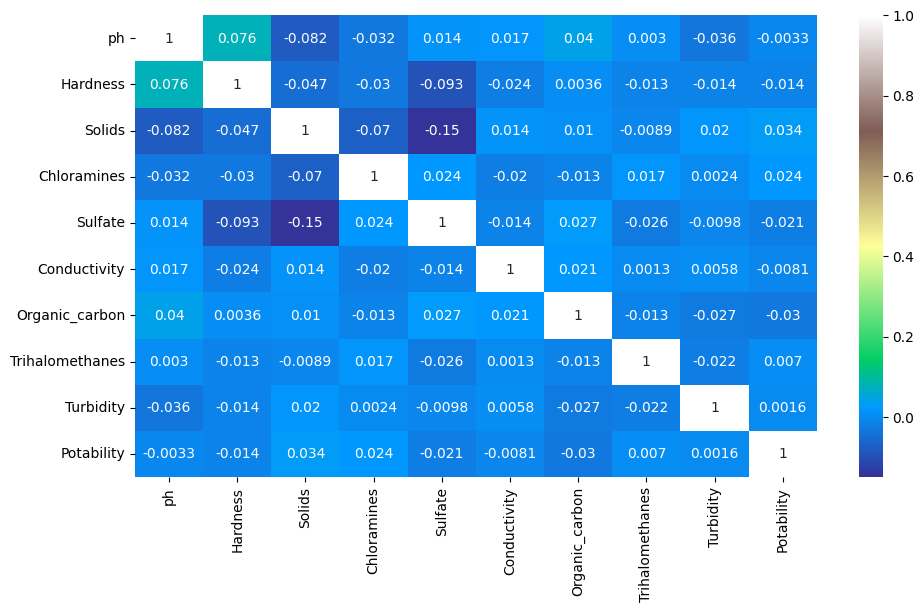

In [9]:
sns.heatmap(data.corr(),annot = True, cmap = 'terrain')
fig = plt.gcf()
fig.set_size_inches(11,6)
plt.show()

####  Checking outliers using Box Plot

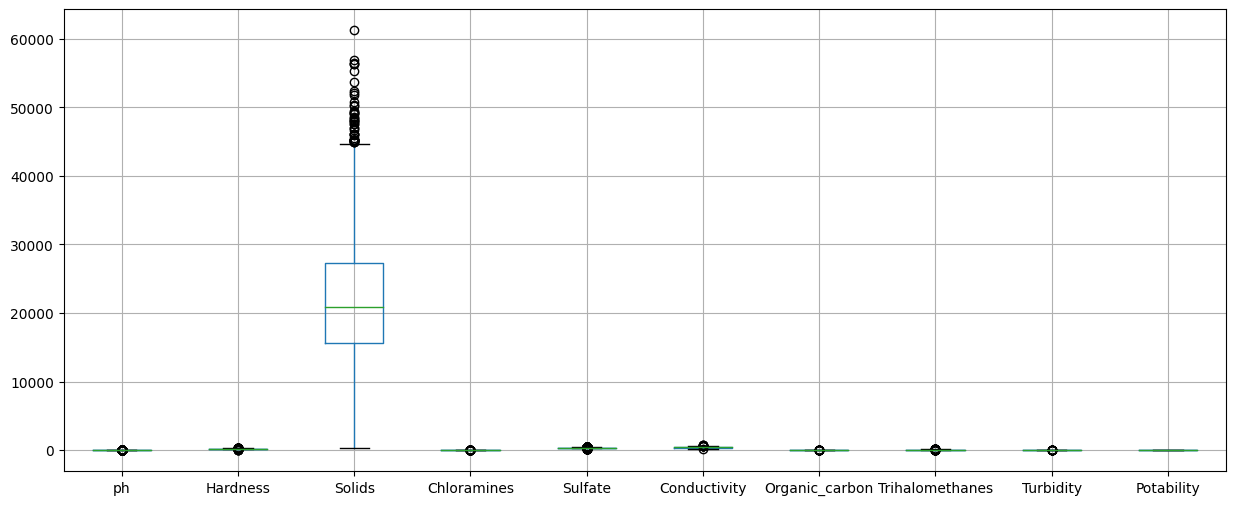

In [10]:
data.boxplot(figsize = (15,6))
plt.show()

In [11]:
data['Solids'].describe()

count     3276.000000
mean     22014.092526
std       8768.570828
min        320.942611
25%      15666.690297
50%      20927.833607
75%      27332.762127
max      61227.196008
Name: Solids, dtype: float64

##### Not removing the Outliers since Solids are one of the important aspect for causing pollution 

In [12]:
data['Potability'].value_counts()

0    1998
1    1278
Name: Potability, dtype: int64

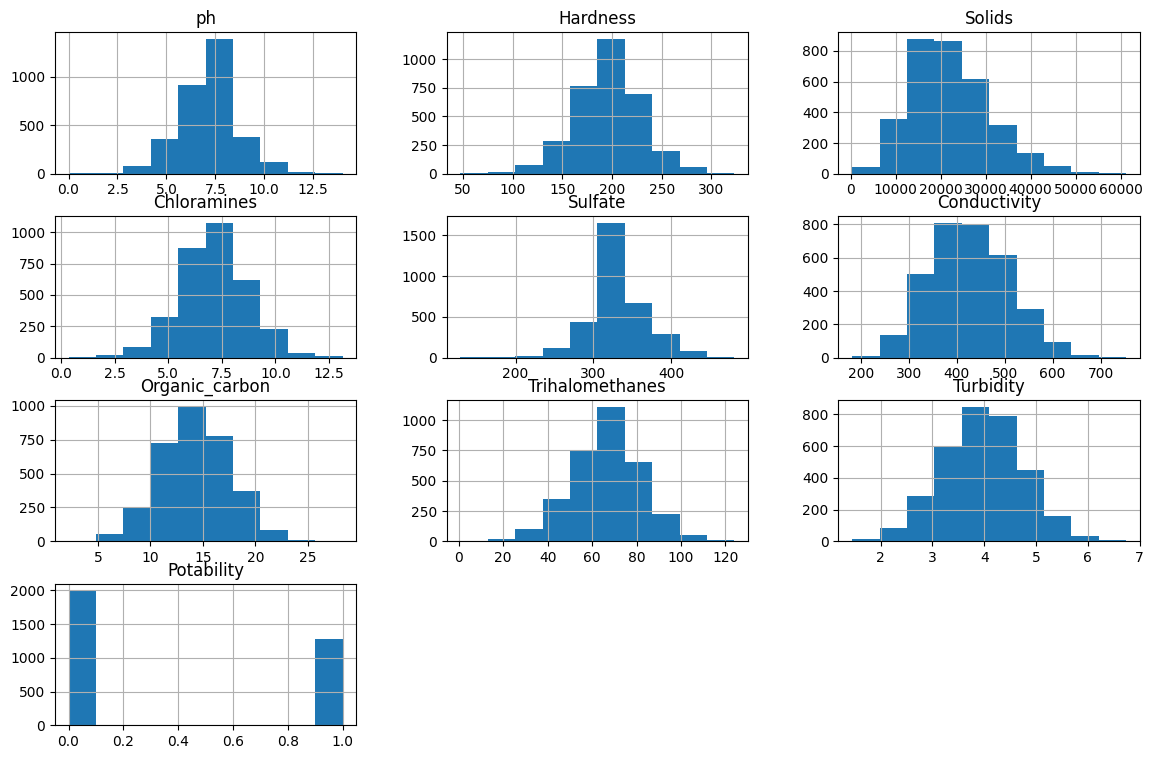

In [13]:
data.hist(figsize = (14,9))
plt.show()

In [14]:
### sns.barplot( x= data['ph'], y = data['Hardness'],hue = data['Potability'])
### plt.show()

## Partitioning

In [15]:
X = data.drop('Potability',axis = 1) #Input data

In [16]:
Y = data['Potability'] # Targer Variable

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2, shuffle = True,random_state = 1)

In [19]:
X_train

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
675,8.977822,198.996287,20225.642923,7.569518,352.685843,492.097825,19.621923,64.177232,3.200000
1359,7.937392,170.445328,6626.376426,5.117364,372.625257,316.022466,23.135952,73.786211,4.270851
1391,5.149133,198.332440,16795.318674,6.708068,326.952617,303.333632,12.510887,66.376374,4.839176
1727,7.399725,258.019947,18535.046452,5.497159,339.838977,354.667312,14.979000,73.008496,3.795124
1677,6.585450,166.965961,30210.250367,9.508299,340.245766,430.078591,23.234326,72.799917,4.275640
...,...,...,...,...,...,...,...,...,...
2763,6.359431,208.203021,23347.172710,9.000395,333.775777,336.585610,14.173906,66.396293,3.636495
905,7.080795,192.202168,34160.925144,8.963156,363.472798,474.781734,15.905270,50.807825,2.998335
1096,7.080795,142.145566,45141.686036,6.030640,240.198505,369.280429,20.605552,70.168389,4.604725
235,4.814136,205.214041,17650.405049,8.121080,350.487939,414.030709,10.999416,47.402666,5.190852


# Model Training

In [20]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

In [21]:
dt.fit(X_train,Y_train)


DecisionTreeClassifier()

In [22]:
y_prediction = dt.predict(X_test)

In [23]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [24]:
accuracy_score(y_prediction,Y_test) * 100

59.90853658536586

In [25]:
confusion_matrix(y_prediction,Y_test)

array([[262, 152],
       [111, 131]], dtype=int64)

In [26]:
from sklearn.metrics import precision_score, f1_score

In [27]:
precision_score(y_prediction,Y_test)

0.4628975265017668

In [28]:
f1_score(y_prediction,Y_test)

0.49904761904761896

# Model Optimization / Hyper Parameter Tuning

In [29]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

dt = DecisionTreeClassifier()
criterion = ['gini','entropy']
splitter = ['best','random']
min_samples_split = range(3,10)

parameters = dict(criterion=criterion,splitter = splitter, min_samples_split = min_samples_split)

cv = RepeatedStratifiedKFold(n_splits=5,random_state = 1)

grid_search_cv_dt= GridSearchCV(estimator = dt,param_grid= parameters, scoring = 'accuracy', cv = cv)


In [30]:
grid_search_cv_dt.fit(X_train,Y_train)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=10, n_splits=5, random_state=1),
             estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'min_samples_split': range(3, 10),
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [31]:
print(grid_search_cv_dt.best_params_)

{'criterion': 'entropy', 'min_samples_split': 9, 'splitter': 'best'}


In [32]:
prediction_grid = grid_search_cv_dt.predict(X_test)

In [33]:
accuracy_score(Y_test,prediction_grid)*100

59.14634146341463

In [34]:
# grid_search_cv_dt.predict([[8.97782,198.996287,20225.642923,7.569518,352.685843,492.097825,19.621923,64.177232,3.200000]])

In [35]:
dt = DecisionTreeClassifier(criterion = 'entropy',min_samples_split=9,splitter = 'best')

In [36]:
dt.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', min_samples_split=9)

In [37]:
# dt.predict([[8.97782,198.996287,20225.642923,7.569518,352.685843,492.097825,19.621923,64.177232,3.200000]])

In [ ]:
import gradio as gr
import numpy as np
import pandas as pd


def predict_output(ph, hardness, solids, chloramines, sulfate, conductivity, organic_carbon, trihalomethanes, turbidity):
    inputs = np.array([[ph, hardness, solids, chloramines, sulfate, conductivity, organic_carbon, trihalomethanes, turbidity]])
    prediction = dt.predict(inputs)
    output = "Safe to drink" if prediction[0] == 0 else "Not safe to drink"
    return output

input_interfaces = [
    gr.inputs.Number(label="Ph",default=data.ph.mean()),
    gr.inputs.Number(label="Hardness",default=data.Hardness.mean()),
    gr.inputs.Number(label="Solids",default=data.Solids.mean()),
    gr.inputs.Number(label="Chloramines",default=data.Chloramines.mean()),
    gr.inputs.Number(label="Sulfate",default=data.Sulfate.mean()),
    gr.inputs.Number(label="Conductivity",default=data.Conductivity.mean()),
    gr.inputs.Number(label="Organic Carbon",default=data.Organic_carbon.mean()),
    gr.inputs.Number(label="Trihalomethanes",default=data.Trihalomethanes.mean()),
    gr.inputs.Number(label="Turbidity",default=data.Turbidity.mean())
]

output_interface = gr.outputs.Label(label="Is water safe to drink?")

gradio_interface = gr.Interface(fn=predict_output, inputs=input_interfaces, outputs=output_interface)

gradio_interface.launch(debug=True)


C:\Users\msai8\AppData\Local\Programs\Python\Python311\Lib\site-packages\gradio\outputs.py:197: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  warnings.warn(
C:\Users\msai8\AppData\Local\Programs\Python\Python311\Lib\site-packages\gradio\deprecation.py:40: UserWarning: The 'type' parameter has been deprecated. Use the Number component instead.
  warnings.warn(value)


Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


C:\Users\msai8\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\msai8\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\msai8\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\msai8\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\msai8\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid

In [40]:
data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
